# CNN Model for Drawings recognition

Author : keshav  - 2020

This notebook aims to build a **Convolutional Neural Network** model to perform a **Multiclass classification** of drawings from the **"Quick, Draw!"** dataset, publicly available [here](https://console.cloud.google.com/storage/browser/quickdraw_dataset/full/numpy_bitmap/?pli=1).
This simple model is part of a tutorial that shows how to build an **image recognition web-app** using **Flask**.
Images are already preprocessed to 28x28 pixel image size, and sorted by category. In this tutorial, we will deal with animal drawings.

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K


## Preprocessing

Let's load data from 6 different classes : cat, sheep, giraffe, bat, octopus and camel. Each drawing consists in 784 pixels, and each dataset has between 123 000 and 150 000 drawings.

In [16]:
# load the data
ant = np.load('E:/SBIR/Quickdraw/full_numpy_bitmap_ant.npy')
bee = np.load('E:/SBIR/Quickdraw/full_numpy_bitmap_bee.npy')
bear = np.load('E:/SBIR/Quickdraw/full_numpy_bitmap_bear.npy')
bird = np.load('E:/SBIR/Quickdraw/full_numpy_bitmap_bird.npy')
cat = np.load('E:/SBIR/Quickdraw/full_numpy_bitmap_cat.npy')
cow = np.load('E:/SBIR/Quickdraw/full_numpy_bitmap_cow.npy')
#crab = np.load('E:/SBIR/Quickdraw/full_numpy_bitmap_crab.npy')
#crocodile = np.load('E:/SBIR/Quickdraw/full_numpy_bitmap_crocodile.npy')
dog = np.load('E:/SBIR/Quickdraw/full_numpy_bitmap_dog.npy')
dolphin = np.load('E:/SBIR/Quickdraw/full_numpy_bitmap_dolphin.npy')
#dragon = np.load('E:/SBIR/Quickdraw/full_numpy_bitmap_dragon.npy')
elephant = np.load('E:/SBIR/Quickdraw/full_numpy_bitmap_elephant.npy')
#flamingo = np.load('E:/SBIR/Quickdraw/full_numpy_bitmap_flamingo.npy')
frog = np.load('E:/SBIR/Quickdraw/full_numpy_bitmap_frog.npy')
giraffe = np.load('E:/SBIR/Quickdraw/full_numpy_bitmap_giraffe.npy')
#hedgehog = np.load('E:/SBIR/Quickdraw/full_numpy_bitmap_hedgehog.npy')
horse = np.load('E:/SBIR/Quickdraw/full_numpy_bitmap_horse.npy')
#kangaroo = np.load('E:/SBIR/Quickdraw/full_numpy_bitmap_kangaroo.npy')
lion = np.load('E:/SBIR/Quickdraw/full_numpy_bitmap_lion.npy')
#lobster = np.load('E:/SBIR/Quickdraw/full_numpy_bitmap_lobster.npy')
monkey = np.load('E:/SBIR/Quickdraw/full_numpy_bitmap_monkey.npy')
octopus = np.load('E:/SBIR/Quickdraw/full_numpy_bitmap_octopus.npy')
#panda = np.load('E:/SBIR/Quickdraw/full_numpy_bitmap_panda.npy')
#parrot = np.load('E:/SBIR/Quickdraw/full_numpy_bitmap_parrot.npy')
#penguin = np.load('E:/SBIR/Quickdraw/full_numpy_bitmap_penguin.npy')
pig = np.load('E:/SBIR/Quickdraw/full_numpy_bitmap_pig.npy')
rabbit = np.load('E:/SBIR/Quickdraw/full_numpy_bitmap_rabbit.npy')
#raccoon = np.load('E:/SBIR/Quickdraw/full_numpy_bitmap_raccoon.npy')
#rhinoceros = np.load('E:/SBIR/Quickdraw/full_numpy_bitmap_rhinoceros.npy')
#scorpion = np.load('E:/SBIR/Quickdraw/full_numpy_bitmap_scorpion.npy')
#sea_turtle = np.load('E:/SBIR/Quickdraw/full_numpy_bitmap_sea turtle.npy')
shark = np.load('E:/SBIR/Quickdraw/full_numpy_bitmap_shark.npy')
sheep = np.load('E:/SBIR/Quickdraw/full_numpy_bitmap_sheep.npy')
#snail = np.load('E:/SBIR/Quickdraw/full_numpy_bitmap_snail.npy')
snake = np.load('E:/SBIR/Quickdraw/full_numpy_bitmap_snake.npy')
#swan = np.load('E:/SBIR/Quickdraw/full_numpy_bitmap_swan.npy')
#tiger = np.load('E:/SBIR/Quickdraw/full_numpy_bitmap_tiger.npy')
#whale = np.load('E:/SBIR/Quickdraw/full_numpy_bitmap_whale.npy')
##zebra = np.load('E:/SBIR/Quickdraw/full_numpy_bitmap_zebra.npy')


print(cat.shape)
print(sheep.shape)
print(giraffe.shape)


(123202, 784)
(126121, 784)
(127182, 784)


For each class, we add a column to set the labels. **{ 0:'cat', 1:'giraffe', 2:'sheep', 3:'bat', 4:'octopus', 5:'camel'}**


In [17]:
ant = np.c_[ant, np.zeros(len(ant))]
bee = np.c_[bee, np.ones(len(bee))]
bear = np.c_[bear, 2*np.ones(len(bear))]
bird = np.c_[bird, 3*np.ones(len(bird))]
cat = np.c_[cat, 4*np.ones(len(cat))]
cow = np.c_[cow, 5*np.ones(len(cow))]
#crocodile = np.c_[crocodile, 6*np.ones(len(crocodile))]
dog = np.c_[dog, 6*np.ones(len(dog))]
dolphin = np.c_[dolphin, 7*np.ones(len(dolphin))]
#dragon = np.c_[dragon, 8*np.ones(len(dragon))]
elephant = np.c_[elephant, 8*np.ones(len(elephant))]
#flamingo = np.c_[flamingo, 11*np.ones(len(flamingo))]
#frog = np.c_[frog, 10*np.ones(len(frog))]
giraffe = np.c_[giraffe, 9*np.ones(len(giraffe))]
#hedgehog = np.c_[hedgehog, 14*np.ones(len(hedgehog))]
horse = np.c_[horse, 10*np.ones(len(horse))]
#kangaroo = np.c_[kangaroo, 16*np.ones(len(kangaroo))]
lion = np.c_[lion, 11*np.ones(len(lion))]
#lobster = np.c_[lobster, 18*np.ones(len(lobster))]
monkey = np.c_[monkey, 12*np.ones(len(monkey))]
octopus = np.c_[octopus, 13*np.ones(len(octopus))]
#panda = np.c_[panda, 16*np.ones(len(panda))]
#parrot = np.c_[parrot, 22*np.ones(len(parrot))]
#penguin = np.c_[penguin, 23*np.ones(len(penguin))]
pig = np.c_[pig, 14*np.ones(len(pig))]
rabbit = np.c_[rabbit, 15*np.ones(len(rabbit))]
#raccoon = np.c_[raccoon, 26*np.ones(len(raccoon))]
#rhinoceros = np.c_[rhinoceros, 27*np.ones(len(rhinoceros))]
#scorpion = np.c_[scorpion, 19*np.ones(len(scorpion))]
#sea_turtle = np.c_[sea_turtle, 29*np.ones(len(sea_turtle))]
shark = np.c_[shark, 16*np.ones(len(shark))]
sheep = np.c_[sheep, 17*np.ones(len(sheep))]
#snail = np.c_[snail, 32*np.ones(len(snail))]
snake = np.c_[snake, 18*np.ones(len(snake))]
#swan = np.c_[swan, 34*np.ones(len(swan))]
#tiger = np.c_[tiger, 23*np.ones(len(tiger))]
#whale = np.c_[whale, 36*np.ones(len(whale))]
#zebra = np.c_[zebra, 37*np.ones(len(zebra))]



print(cat.shape)

(123202, 785)


Let's have a look at our samples. 

In [18]:
def plot_samples(input_array, rows=4, cols=5, title=''):
    '''
    Function to plot 28x28 pixel drawings that are stored in a numpy array.
    Specify how many rows and cols of pictures to display (default 4x5).  
    If the array contains less images than subplots selected, surplus subplots remain empty.
    '''
    fig, ax = plt.subplots(figsize=(cols,rows))
    ax.axis('off')
    plt.title(title)

    for i in list(range(0, min(len(input_array),(rows*cols)) )):      
        a = fig.add_subplot(rows,cols,i+1)
        imgplot = plt.imshow(input_array[i,:784].reshape((28,28)), cmap='gray_r', interpolation='nearest')
        plt.xticks([])
        plt.yticks([])

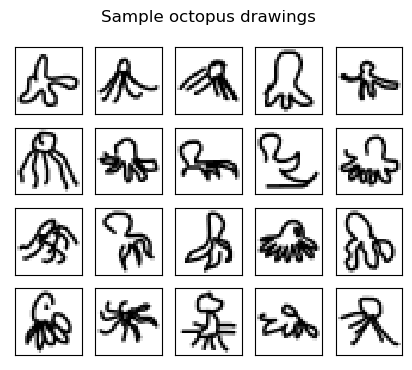

In [19]:
plot_samples(octopus, title='Sample octopus drawings\n')

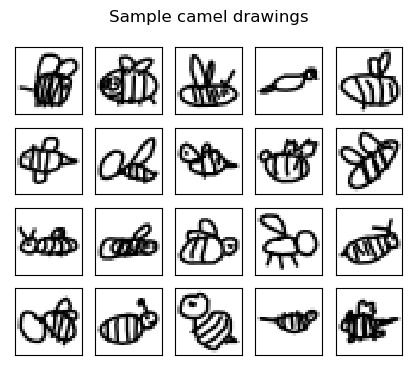

In [20]:
plot_samples(bee, title='Sample camel drawings\n')

Next step : 
* We need to combine our data so we can use it for the train and test. I will only use 10 000 samples for this model.
* We then can split the features and labels (X and y).
* Finally, we split data between train and test following the usual (80 - 20) ratio. We also normalize values between 0 and 1 (X/255) as pixels values are initially gray scale between 0 and 255.

In [36]:
# Merging arrays and splitting the features and labels
X = np.concatenate((cat[:3000,:-1], giraffe[:3000,:-1], sheep[:3000,:-1], ant[:3000,:-1], octopus[:3000,:-1], ant[:3000, :-1], bee[:3000, :-1], bear[:3000, :-1], bird[:3000, :-1],cow[:3000, :-1],dog[:3000, :-1],dolphin[:3000, :-1],elephant[:3000, :-1],giraffe[:3000, :-1],horse[:3000, :-1],lion[:3000, :-1],monkey[:3000, :-1],pig[:3000, :-1],rabbit[:3000, :-1],shark[:3000, :-1],snake[:3000, :-1]), axis=0).astype('float32') # all columns but the last
y = np.concatenate((cat[:3000,-1], giraffe[:3000,-1], sheep[:3000,-1], ant[:3000,-1], octopus[:3000,-1],  ant[:3000,-1],bee[:3000,-1],bear[:3000,-1],bird[:3000,-1],cow[:3000,-1],dog[:3000,-1],dolphin[:3000,-1],elephant[:3000,-1],giraffe[:3000,-1],horse[:3000,-1],lion[:3000,-1],monkey[:3000,-1],pig[:3000,-1],rabbit[:3000,-1],shark[:3000,-1],snake[:3000,-1]), axis=0).astype('float32') # the last column

# We than split data between train and test (80 - 20 usual ratio). Normalizing the value between 0 and 1
X_train, X_test, y_train, y_test = train_test_split(X/255.,y,test_size=0.2,random_state=0)

Output variable is an integer from 0 to 5 (MultiClass Classification problem). We are gonna use a one hot encoding of the class values.

In [38]:
# one hot encode outputs
y_train_cnn = np_utils.to_categorical(y_train)
y_test_cnn = np_utils.to_categorical(y_test)
num_classes = y_test_cnn.shape[1]
print(num_classes)

19


In [39]:
# reshape to be [samples][pixels][width][height]
X_train_cnn = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test_cnn = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

# CNN Model

We will now to build our CNN model using Keras. This model will have the following layers : 
   * **Convolutional Layer** : 30 filters, (3 * 3) kernel  size
   * **Max Pooling Layer** : (2 * 2) pool size
   * **Convolutional Layer** : 15 filters, (3 * 3) kernel size
   * **Max Pooling Layer** : (2 * 2) pool size
   * **DropOut Layer** : Dropping 20% of neurons.
   * **Flatten Layer**
   * **Dense/Fully Connected Layer** : 128 Neurons, *Relu* activation function
   * **Dense/Fully Connected Layer** : 50 Neurons, *Softmax* activation function
   
**Input shape** : pixels * width * height : 1 * 28 * 28

We run our model for **15** epochs and with a batch size of **200**.

In [52]:
def cnn_model():
    # create model
    model = Sequential()
    model.add(Conv2D(30, (3, 3), input_shape=(1, 28, 28), activation='relu',padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
    model.add(Conv2D(15, (3, 3), activation='relu',padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [55]:
%%time
np.random.seed(0)
# build the model
model_cnn = cnn_model()
# Fit the model
model_cnn.fit(X_train_cnn, y_train_cnn, validation_data=(X_test_cnn, y_test_cnn), epochs=50, batch_size=30)
# Final evaluation of the model
scores = model_cnn.evaluate(X_test_cnn, y_test_cnn, verbose=0)
print('Final CNN accuracy: ', scores[1])

Epoch 1/50
1680/1680 [==============================] - 6s 3ms/step - loss: 1.9443 - accuracy: 0.4118 - val_loss: 1.5998 - val_accuracy: 0.5294
Epoch 2/50
1680/1680 [==============================] - 5s 3ms/step - loss: 1.5908 - accuracy: 0.5183 - val_loss: 1.4511 - val_accuracy: 0.5705
Epoch 3/50
1680/1680 [==============================] - 5s 3ms/step - loss: 1.4761 - accuracy: 0.5503 - val_loss: 1.3685 - val_accuracy: 0.5879
Epoch 4/50
1680/1680 [==============================] - 6s 4ms/step - loss: 1.4097 - accuracy: 0.5724 - val_loss: 1.3155 - val_accuracy: 0.6081
Epoch 5/50
1680/1680 [==============================] - 5s 3ms/step - loss: 1.3617 - accuracy: 0.5849 - val_loss: 1.2788 - val_accuracy: 0.6126
Epoch 6/50
1680/1680 [==============================] - 5s 3ms/step - loss: 1.3260 - accuracy: 0.5942 - val_loss: 1.2457 - val_accuracy: 0.6212
Epoch 7/50
1680/1680 [==============================] - 5s 3ms/step - loss: 1.2981 - accuracy: 0.6039 - val_loss: 1.2268 - val_accuracy:

After our 15 epochs, we finally almost reach **93** % accuracy which seems fair for our project and with only a small part of the total dataset used for training! Let's go further and analyse the confusion matrix.

# Confusion Matrix

In [56]:
y_pred_cnn = model_cnn.predict_classes(X_test_cnn, verbose=0)

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [15]:
from sklearn import metrics
c_matrix = metrics.confusion_matrix(y_test, y_pred_cnn)

In [58]:
import seaborn as sns
def confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [59]:
class_names = ['cat', 'giraffe', 'sheep', 'bat', 'octopus', 'camel']
confusion_matrix(c_matrix, class_names, figsize = (10,7), fontsize=14)

NameError: name 'c_matrix' is not defined

In [60]:
#Misclassification when y_pred and y_test are different.
misclassified = X_test[y_pred_cnn != y_test]

NameError: name 'y_pred_cnn' is not defined

In [61]:
plot_samples(misclassified, rows=10, cols=5, title='')

NameError: name 'misclassified' is not defined

Those results seems good : most of the misclassified images could have been easily mistaken, even by an human.

## Saving our model

As stated earlier, we would like to embbed our model in **Flask Web-App**. To do so, it is more convenient to save (serialize) our model using **pickle**.
*(Note : You could directly train your model into flask, but it would be really time consuming and inefficient).*
By doing so, we will be able to predict new images given by the user.

In [62]:
import pickle
with open('model_cnn.pkl', 'wb') as file:
      pickle.dump(model_cnn, file)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dropout
......vars
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...layers\max_pooling2d_1
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-04-0

That's it ! We will now use our model_cnn to predict new user inputs by embedding it into a flask app !